In [1]:
import geopandas
import pandas as pd
import matplotlib as plt

In [2]:
geo_opendata = geopandas.read_file('Source/2010 Census Tracts.geojson')
geo_slim = geopandas.read_file('Clean Data/geo_income_rent.geojson')
zipcode = geopandas.read_file('Source/ZIP_CODE_shapefile/ZIP_CODE_040114.shp')
nyu_tract = geopandas.read_file('Source/nyu_2010 New York City Census Tracts/nyu_2451_34505.shp')

In [34]:
geo_slim.head()

,GEO_ID,County,first_4_digits,boro,MEDIAN_HOUSEHOLD_INCOME_2010,MEDIAN_RENT_2010,GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010,geometry
0,36005000100,Bronx County,3600,5000,-666666666,0,0,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Bronx County,3600,5000,59826,482,30,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Bronx County,3600,5000,71968,560,60,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Bronx County,3600,5001,30355,1494,94,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Bronx County,3600,5001,25093,568,46,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."


<AxesSubplot:>

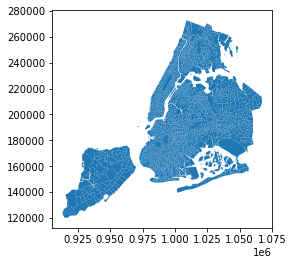

In [20]:
nyu_tract.plot()

In [21]:
nyu_tract.head()

,tractid,tractnum,name,namelsad,nta,nta_name,bcode,geometry
0,36005000100,000100,1,Census Tract 1,BX98,Rikers Island,36005,"POLYGON ((1019965.737 226696.334, 1019943.935 ..."
1,36005000200,000200,2,Census Tract 2,BX09,Soundview-Castle Hill-Clason Point-Harding Park,36005,"POLYGON ((1021558.247 236060.696, 1021824.736 ..."
2,36005000400,000400,4,Census Tract 4,BX09,Soundview-Castle Hill-Clason Point-Harding Park,36005,"MULTIPOLYGON (((1023113.723 236337.849, 102336..."
3,36005001600,001600,16,Census Tract 16,BX09,Soundview-Castle Hill-Clason Point-Harding Park,36005,"POLYGON ((1022690.148 238650.346, 1022944.985 ..."
4,36005001900,001900,19,Census Tract 19,BX39,Mott Haven-Port Morris,36005,"MULTIPOLYGON (((1003183.626 233654.444, 100336..."


In [5]:
cols = ['tractid','nta','nta_name']
nyu_tract_slim = nyu_tract[cols]

In [6]:
nyu_tract_slim['tractid'] = nyu_tract_slim['tractid'].astype(int)
print(nyu_tract_slim.dtypes)

tractid      int64
nta         object
nta_name    object
dtype: object


<ipython-input-6-37406e2b821b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyu_tract_slim['tractid'] = nyu_tract_slim['tractid'].astype(int)


In [7]:
nyu_tract_slim.rename(columns={'tractid':"GEO_ID"}, inplace=True)

/usr/local/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
geo_name_income_rent = pd.merge(nyu_tract_slim, geo_slim, how='inner', on='GEO_ID')

In [12]:
geo_name_income_rent.dtypes
geo_name_income_rent.head()

,GEO_ID,nta,nta_name,County,first_4_digits,boro,MEDIAN_HOUSEHOLD_INCOME_2010,MEDIAN_RENT_2010,GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010,geometry
0,36005000100,BX98,Rikers Island,Bronx County,3600,5000,-666666666,0,0,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,BX09,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,3600,5000,59826,482,30,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,BX09,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,3600,5000,71968,560,60,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,BX09,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,3600,5001,30355,1494,94,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,BX39,Mott Haven-Port Morris,Bronx County,3600,5001,25093,568,46,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."


In [13]:
geo_name_income_rent.drop(columns=['first_4_digits', 'boro', 'nta'])

,GEO_ID,nta_name,County,MEDIAN_HOUSEHOLD_INCOME_2010,MEDIAN_RENT_2010,GROSS_RENT_MEDIAN_INCOME_PERCENTAGE_2010,geometry
0,36005000100,Rikers Island,Bronx County,-666666666,0,0,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,59826,482,30,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,71968,560,60,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Soundview-Castle Hill-Clason Point-Harding Park,Bronx County,30355,1494,94,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Mott Haven-Port Morris,Bronx County,25093,568,46,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."
...,...,...,...,...,...,...,...
2159,36085030301,Mariner's Harbor-Arlington-Port Ivory-Granitev...,Richmond County,67431,758,88,"POLYGON ((-8253911.271 4957176.553, -8253911.3..."
2160,36085030302,Mariner's Harbor-Arlington-Port Ivory-Granitev...,Richmond County,75724,512,18,"POLYGON ((-8255509.486 4957411.225, -8255480.7..."
2161,36085031901,Mariner's Harbor-Arlington-Port Ivory-Granitev...,Richmond County,30492,829,65,"POLYGON ((-8255488.224 4958475.827, -8255491.6..."
2162,36085031902,Mariner's Harbor-Arlington-Port Ivory-Granitev...,Richmond County,44412,630,102,"MULTIPOLYGON (((-8255601.770 4959713.657, -825..."


In [14]:
geo_name_income_rent.to_file('geo_name_income_rent.geojson',driver='GeoJSON')
trialyield[[title_col, 'yield', 'geometry']].to_file('trialyield_output.shp')

AttributeError: 'DataFrame' object has no attribute 'to_file'

<AxesSubplot:>

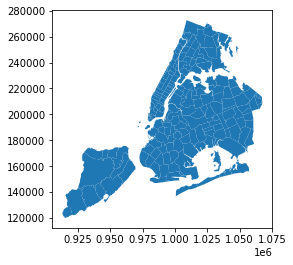

In [22]:
zipcode.plot()

In [28]:
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [31]:
cols_zip = ['ZIPCODE', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'geometry']
zipcode_slim = zipcode[cols_zip]
zipcode_slim.head()

,ZIPCODE,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,geometry
0,11436,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [32]:
zipcode_slim.to_file('zipcode.geojson',driver='GeoJSON')